# Modelo linear generalizado - Distribuição binomial

Adaptado de https://github.com/mvbdf/exemplos_mlg/blob/main/exemplo_binomial.ipynb

Um modelo binomial com função de ligação canônica é ajustado aos dados do Exemplo 5, pag. 16 do
livro Demétrio, C. G. B. (2002), Modelos Lineares Generalizados em Experimentação Agronômica, ESALQ
(https://docs.ufpr.br/~niveam/micro%20da%20sala/bom/Apostila%20de%20MLG.pdf).

O modelo relaciona a probabilidade de que um inseto (pulgão) morra com a dose do inseticida (rotenone).
Para cada dose foram utilizados m insetos no experimento dos quais y morreram após um certo tempo de
exposição ao inseticida. Seis doses diferentes foram testadas. Esse tipo de estudo é conhecido como ensaio
dose-resposta.

A linguagem $\color{cyan}Julia$ é utilizada no exemplo.

In [2]:
using Distributions, Plots, GLM, DataFrames
theme(:default)
default(label="")

In [3]:
dose = [10.2, 7.7, 5.1, 3.8, 2.6, 0.0]
m = [50, 49, 46, 48, 50, 49]
y = [44, 42, 24, 16, 6, 0]
resposta = (y, m-y)
pmortos = y ./ m

doses, respostas = Vector{Int64}(), Vector{Float64}()
for i ∈ 1:length(y) 
    append!(respostas, fill(dose[i], m[i]))
    append!(doses, fill(1, y[i])); append!(doses, fill(0, m[i]-y[i]))
end
data = DataFrame(dose=respostas,resposta=doses)

Row,dose,resposta
,Float64,Int64
1,10.2,1
2,10.2,1
3,10.2,1
4,10.2,1
5,10.2,1
6,10.2,1
7,10.2,1
8,10.2,1
9,10.2,1


O objeto resposta representa a variável resposta e tem duas colunas: número de insetos mortos e número de
insetos sobreviventes. O número de insetos no estudo foi

In [4]:
data |> nrow

292

Os dados neste exemplo estão na forma agregada. Na forma bruta terîamos um vetor de respostas binárias
$y$ (292 × 1) e um vetor $x$ (292 × 1) com os valores das doses, sendo que 10,2 estaria repetido 50 vezes, . . . ,
0,0 estaria repetido 49 vezes.

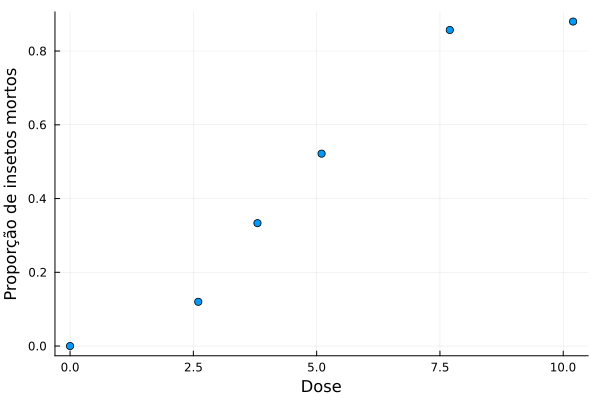

In [5]:
scatter(dose, pmortos)
xlabel!("Dose")
ylabel!("Proporção de insetos mortos")

In [6]:
model = glm(@formula(resposta~1+dose), data, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

resposta ~ 1 + dose

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -3.22566    0.369574   -8.73    <1e-17  -3.95001   -2.50131
dose          0.605125   0.0677329   8.93    <1e-18   0.472371   0.737879
─────────────────────────────────────────────────────────────────────────

As proporções de insetos mortos e o modelo ajustado são mostrados na figura abaixo

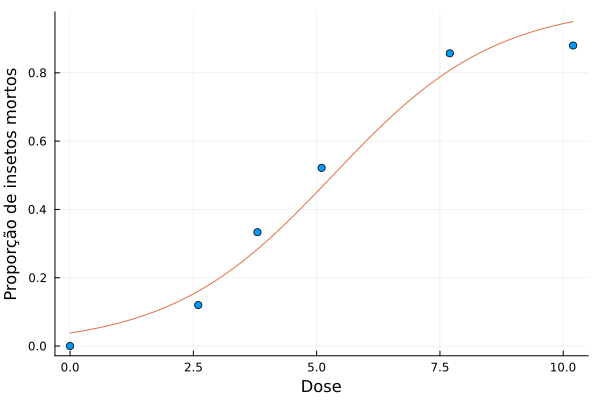

In [7]:
x = range(dose[1], dose[end], 100)
plot!(x, predict(model, DataFrame(dose=x)), line=:line)

In [8]:
## Intervalos de confiança assintóticos
# Aproximação pela dist. normal inclusa no resumo do modelo

# Intervalos de confiança (veros. perfilada)
# (por fazer)

## Funções de ligação
As funções de ligação logito (regressão logística), probito e complemento log-log são bastante utilizadas no
modelo binomial. As expressões são dadas abaixo, sendo que $\eta = x > \beta \in R$ é o preditor linear, $\pi = \mu / m$ e $\Phi$ denota a função distribuição acumulada da distribuição normal $(0, 1)$.

$$\log\left(\frac{\pi}{1-\pi}\right) = \eta, \quad \pi = \frac{e^\eta}{1 + e^\eta}: \quad \text{logito},\tag{1}$$

$$\Phi^{-1} \left(\pi\right) = \eta, \quad \pi = \Phi \left(\eta\right): \quad \text{probito},\tag{2}$$

$$\log\left(-\log\left(1-\pi\right)\right) = \eta, \quad \pi = 1- \exp\left(-\exp\left(\eta\right)\right): \quad \text{complemento log-log}.\tag{3}$$

As funções de ligação logito e probito são simétricas, significando que $\pi\left(\eta\right) = 1 - \pi\left(-\eta\right)$ para todo $\eta \in \mathbb{R}$. Com a função de ligação complemento log-log, temos $\pi\left(\eta\right) \geq 1 - \pi\left(-\eta\right)$ para todo $\eta > 0$.

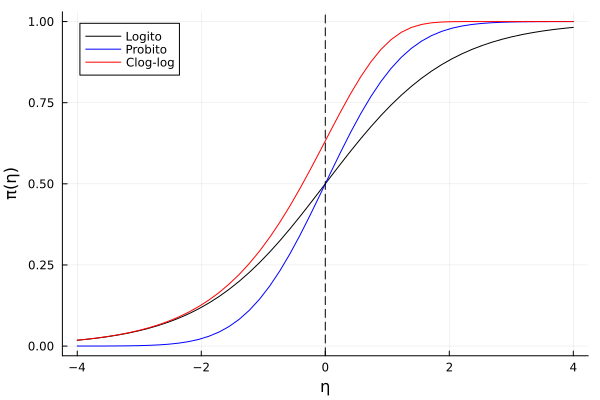

In [9]:
## Inversa das funções de ligação
# Complemento log-log (Clog-log)

X = range(-4, 4, 50)

plot(X, cdf(Logistic(), X), color="black", label="Logito")
plot!(X, cdf(Normal(), X), color="blue", label="Probito")
plot!(X, ccdf(GeneralizedExtremeValue(0, 1, 0), -X), color="red", label="Clog-log")
vline!([0], color="black", linestyle=:dash, linewidth=1)
xlabel!("η")
ylabel!("π(η)")

**Nota 1**. Modelos com as funções de ligação probito e complemento log-log são ajustados com os comandos
abaixo.

In [10]:
mprob = glm(@formula(resposta~1+dose), data, Binomial(), ProbitLink())
mloglog = glm(@formula(resposta~1+dose), data, Binomial(), CloglogLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, CloglogLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

resposta ~ 1 + dose

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -2.39722    0.245189   -9.78    <1e-21  -2.87778   -1.91666
dose          0.344858   0.0348172   9.90    <1e-22   0.276617   0.413098
─────────────────────────────────────────────────────────────────────────

## Razão de chances

Se $\pi$ denota a probabilidade de um evento occorrer, $C = \pi / (1 − \pi)$ é a chance (*odds*) de que o evento ocorra, notando que $C$ é uma função monótona crescente em $\pi$. Para as funções de ligação nas expressões acima, obtemos

$$C = \frac{\frac{e^{\eta}}{1 + e^{\eta}}}{1 − \frac{e^{\eta}}{1 + e^{\eta}}} = e^{\eta}\tag{4}$$
$$C = \frac{\Phi(\eta)}{1 − \Phi(\eta)} \quad \text{e}$$
$$C = \frac{1 − \exp ( − \exp(−\eta))}{\exp ( − \exp(−\eta))}.$$

Considere $x_2 \neq x_1$ (de modo que $\eta_2 = x_2^T\beta \neq \eta_1 = x_1^T \beta$) com chances $C_2$ e $C_1$. A razão de chances (*odds ratio*) é dada por $RC = C_2/C_1$. Tomando a função de ligação logito, da expressão (4) resulta

$$RC = \frac{e^{\eta_2}}{e^{\eta_1}} = e^{{\eta_2}−{\eta_1}} = \exp \left(\left(x_2 − x_1\right)^T\beta\right). \tag{5}$$

Retornando ao modelo binomial, temos $Y \sim \text{binomial}\left(m, \pi\right)$ e $E(Y) = \mu = m\pi$. De acordo com o modelo e usando a função de ligação logito dada por (1), temos que

$$\log\left(\frac{\mu}{m-\mu}\right) = \log\left(\frac{\pi}{1-\pi}\right) = \beta_1 + \beta_1\cdot dose. \tag{6}$$

O lado esquerdo de (6) é chamado de logito da probabilidade $\pi$, que é representado por uma função linear dos coeficientes $\beta.$

Em seguida comparamos dois valores de doses, dose1 e dose2, sendo que $dose_2 = dose_1 + 1$. Logo, $x_1 = (1, dose_1)^T$, $x_2 = (1, dose_2)^T = (1, dose_1 + 1)^T$ e $x_2 − x_1 = (0, 1)^T$. A partir de (5) obtemos

$$RC = \exp\left(\left(0,1\right)\beta\right) = \exp\left(0\cdot \beta_1 + 1\cdot \beta_2\right) = e^{\beta_2}.$$

Portanto, a chance de um inseto morrer é multiplicada por $e^{\beta_2}$ quando a dose é aumentada em uma unidade, qualquer que seja a dose. Desta forma, o coeficiente da variável $dose \left(\beta_2\right)$ tem um interpretação.

Em um modelo com mais de uma covariável ($p > 2$), a interpretação de cada coeficiente $\beta_j, j\neq 1$, é semelhante tomando-se a covariável $x_j$ acrescida de uma unidade $\left(x_j+1\right)$ e mantendo-se constantes os valores de todas as demais covariáveis.


In [11]:
coefs = b1, b2 = (coef)(model)
print("Razão de chances: $(exp(b2))")

Razão de chances: 1.83148050256839

**Nota 2.** Apresente um intervalo de confiança para a razão de chances.

Note que como $\exp$ é uma função contínua, tudo sai de graça:

In [12]:
print("IC(95%)= $((model |> confint .|> exp)[2,:])")

IC(95%)= [1.603791515197921, 2.0914943117617204]

## Dose letal

É de interesse estimar as doses de inseticida que eliminam $50\%$ e $90\%$ dos insetos, denotadas por $DL_{50}$ e $DL_{90}$, respectivamente. Segue de (6) que

$$dose = \frac{\log\left(\frac{\pi}{1-\pi}\right)-\beta_1}{\beta_2} \tag{7}$$

Da expressão (7) obtemos

$$DL_{50} = \frac{\log\left(\frac{0.5}{1-0.5}\right)-\beta_1}{\beta_2} = -\frac{\beta_1}{\beta_2} \tag{8}$$

e

$$DL_{90} = \frac{\log\left(\frac{0.9}{1-0.9}\right)-\beta_1}{\beta_2} = \frac{2.20 - \beta_1}{\beta_2} \tag{8}$$

In [13]:
DL(prob) = (log(prob/(1-prob)) - b1) / b2

print("DL50 e DL90 = $(DL.([0.5,0.9]))")

DL50 e DL90 = [5.330569794084686, 8.961597797724824]

Aplicamos o método delta para obter um intervalo de confiança de $95\%$ para a dose leta. Calculamos

$$\frac{\partial}{\partial\beta} DL = \left(-\frac{1}{\beta_2}, -\frac{\log\left(\frac{\pi}{1-\pi}\right)-\beta_1}{\beta_2^2}\right)^T = -\frac{1}{\beta_2} \left(1,DL\right)^T$$

e

$$cov\left(DL\right) = \frac{\partial}{\partial\beta^T} DL \cdot \text{cov}\left(\widehat{\beta}\right) \cdot \frac{\partial}{\partial\beta} DL,$$

sendo que um estimador de $\text{cov}\left(\widehat{\beta}\right)$ é dado pelo método *vcov*.

In [14]:
# IC de 95% para DL50 (método delta) 
pDL = 0.5
derivDL = [1, DL(pDL)] ./ b2
epDL = √(derivDL'*vcov(model)*derivDL)
z = quantile(Normal(), (1+0.95)/2)

print("IC DL$(100*pDL): $([DL.(pDL) - z*epDL, DL.(pDL) + z*epDL])")

IC DL50.0: [4.809443521290915, 5.851696066878456]

**Nota 3.** Refaça o exemplo em linguagem SAS ou MatLab ou Stata.